#**Multilabel data set visualization**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations #for label sets imbalance

#P8 polito github
!git clone https://github.com/adsp-polito/2024-P8-PPS.git
dataset_CA=pd.read_excel('/content/2024-P8-PPS/data/DB_clinical_areas.xlsx')
dataset_Interventions=pd.read_excel('/content/2024-P8-PPS/data/DB_interventions.xlsx')
print(f"size of clinical areas dataset: {dataset_CA.shape}")
dataset_CA.head(3)

Cloning into '2024-P8-PPS'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 231 (delta 42), reused 61 (delta 11), pack-reused 115 (from 3)
Receiving objects: 100% (231/231), 203.79 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (72/72), done.
size of clinical areas dataset: (2192, 14)


Title  \
0  Factors Influencing Polish Women's Preference ...   
1  Engaging psoriasis patients in adherence and o...   
2  Cross-sectional Survey Examining Patient Attit...   

                                            Abstract  Gynecology  \
0  Background and Objectives: Shared-decision mak...           1   
1  This article is based on a presentation given ...           0   
2  <b>Background.</b> Early in the COVID-19 pande...           0   

   Respiratory diseases  Renal diseases  Mental health disorders  \
0                     0               0                        0   
1                     0               0                        0   
2                     0               0                        0   

   Neurological diseases  Musculoskeletal diseases  Hematological diseases  \
0                      0                         0                       0   
1                      0                         0                       0   
2                      0                         0                       0   

   Oncological diseases  Cardiovascular diseases  Gastrointestinal diseases  \
0                     0                        0                          0   
1                     0                        0                          0   
2                     1                        0                          1   

   Endocrine diseases  Dental diseases  
0                   0                0  
1                   0                0  
2                   0                0

In [2]:
print(f"size of interventions dataset: {dataset_Interventions.shape}")
dataset_Interventions.head(3)

size of interventions dataset: (2192, 8)


Title  \
0  factor influencing polish woman mode delivery ...   
1  engaging psoriasis adherence outcome topical t...   
2  crosssectional examining attitude rescheduling...   

                                            Abstract  telemedicine  imaging  \
0  background objective shareddecision become tre...             0        0   
1  article based presentation given author satell...             0        0   
2  background early pandemic colonoscopy colorect...             0        1   

   surgery  drug  screening  device  
0        1     0          0       0  
1        0     1          0       0  
2        0     0          1       0

##**Imbalance problem visualization**

###Functions 1

In [3]:
def addNotClassified(dataset):
    data=dataset.copy()
    data["Not Classified"] = dataset.iloc[:, 2:].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)
    return data

def plot_imbalance_within_labels(dataset,category):
      # Sum values in each column from the third column to the end
    column_sums = dataset.iloc[:, 2:].sum()

    # Order columns by their sum
    column_sums = column_sums.sort_values(ascending=False)

    df=pd.DataFrame(column_sums.T)
    df.columns = ['Positive']
    df.index.name = category
    df['Negative'] = dataset.shape[0] - df['Positive']
    df.plot.bar(figsize=(10, 6))

    # Add labels and title
    plt.title("1. Imbalance within labels (sorted)", fontsize=14)
    plt.ylabel("Frequency", fontsize=12)
    plt.xlabel(category, fontsize=12)


def plot_imbalance_between_labels(dataset,category):

    # Sum values in each column from the third column to the end
    column_sums = dataset.iloc[:, 2:].sum()

    # Order columns by their sum
    column_sums = column_sums.sort_values(ascending=False)

    # Plot the results as a barplot
    plt.figure(figsize=(10, 6))
    column_sums.plot(kind="bar", color='skyblue')

    # Add labels and title
    plt.title("2. Imbalance between labels (sorted)", fontsize=14)
    plt.ylabel("Frequency", fontsize=12)
    plt.xlabel(category, fontsize=12)
    plt.xticks(rotation=90)  # Rotate labels vertically
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
def show_imbalance_on_label_sets(df):

    # Assuming you have the dataset in a DataFrame `df`
    # Sample DataFrame for illustration (replace this with your actual data)
    #data = {
    #    'ID': [1, 2, 3, 4],
    #    'Label1': [1, 0, 1, 0],
    #    'Label2': [1, 1, 0, 1],
    #    'Label3': [0, 1, 1, 1]
    #}

    # Step 1: Extract labels from the third column onwards
    labels_df = df.iloc[:, 2:]

    # Step 2: Convert the labels to sets
    label_sets = []

    for _, row in labels_df.iterrows():
        # Extract the indices where the label is 1 (present)
        label_set = set(labels_df.columns[row == 1])
        label_sets.append(frozenset(label_set))  # Use frozenset to ensure uniqueness

    # Step 3: Count the frequency of each label set
    label_set_freq = pd.Series(label_sets).value_counts().reset_index()

    # Rename columns for better understanding
    label_set_freq.columns = ['Label Set', 'Frequency']

    # Step 4: Sort by frequency
    label_set_freq_sorted = label_set_freq.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

    # Display the result

    print(label_set_freq_sorted)

def add_label_columns_and_plot(dataset, n_labels):
    """
    Adds `n_labels` columns to the dataset based on the sum of horizontal values
    from the third column onward. Then plots the sum of these columns.

    - If the row sum is 0, column '0' = 1 and others = 0.
    - If the row sum is 1, column '1' = 1 and others = 0, etc.
    """
    # Calculate the row-wise sum from the third column onward
    row_sums = dataset.iloc[:, 2:].sum(axis=1)

    # Add n_labels columns (0, 1, 2, ..., n_labels-1)
    for i in range(n_labels):
        dataset[str(i)] = (row_sums == i).astype(int)

    # Sum the values of the newly added columns
    column_sums = dataset.iloc[:, -n_labels:].sum()

    # Plot the results as a barplot
    plt.figure(figsize=(10, 6))
    column_sums.plot(kind="bar")

    # Add labels and title
    plt.title("Inter label count", fontsize=14)
    plt.ylabel("Sum", fontsize=12)
    plt.xlabel("Labels", fontsize=12)
    plt.xticks(rotation=0)  # Keep labels horizontal
    plt.tight_layout()

    # Show the plot
    plt.show()

def show_imbalance_on(dataset,categoryNames):
  '''
  dataset :
  '''
  data=addNotClassified(dataset)
  plot_imbalance_within_labels(data,categoryNames)
  plot_imbalance_between_labels(data,categoryNames)
  print(f"\nDataset of {categoryNames}\nImbalance among labelsets:\n")
  show_imbalance_on_label_sets(data)


###**Dataset imbalance plots**
Three different problem visualizations:
1. Imbalance *Within* labels
2. Imbalance *Between* labels
3. Imbalance *Among labelsets*

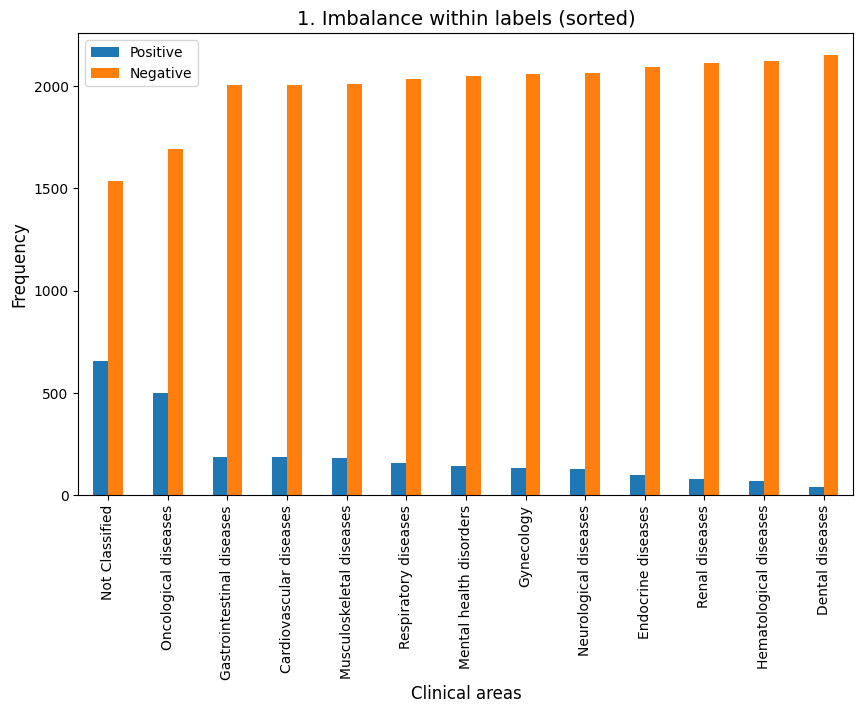


Dataset of Clinical areas
Imbalance among labelsets:

                                            Label Set  Frequency
0                                    (Not Classified)        658
1                              (Oncological diseases)        278
2                          (Musculoskeletal diseases)        158
3                           (Cardiovascular diseases)        126
4                           (Mental health disorders)        125
..                                                ...        ...
83  (Hematological diseases, Mental health disorders)          1
84  (Gastrointestinal diseases, Respiratory diseas...          1
85        (Dental diseases, Musculoskeletal diseases)          1
86                (Gynecology, Neurological diseases)          1
87  (Cardiovascular diseases, Gynecology, Oncologi...          1

[88 rows x 2 columns]


In [5]:
show_imbalance_on(dataset_CA,'Clinical areas')

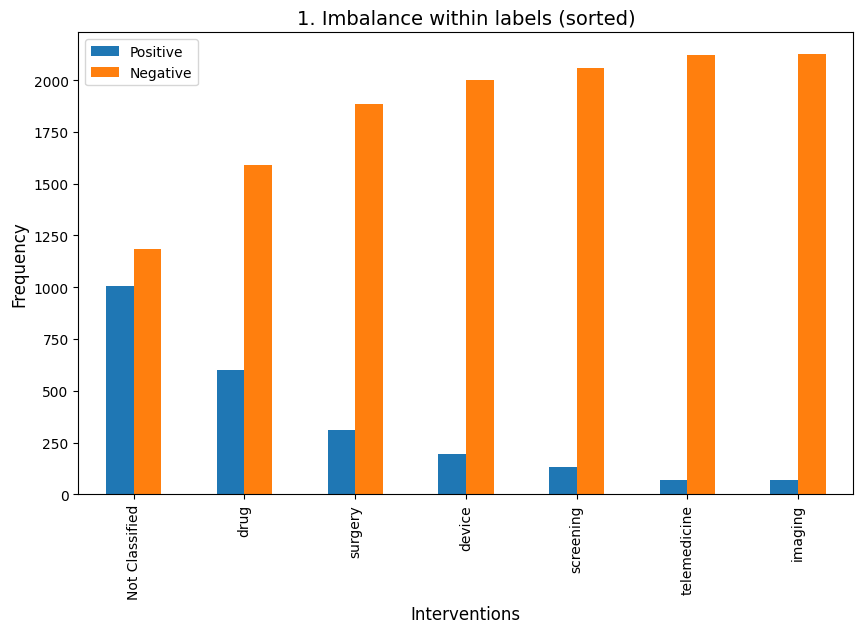

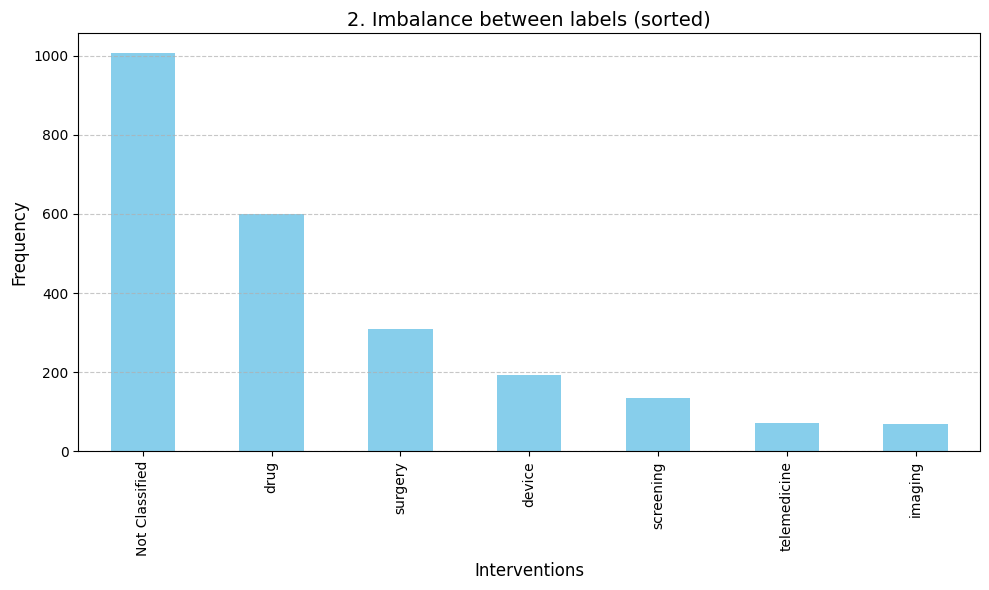


Dataset of Interventions
Imbalance among labelsets:

                        Label Set  Frequency
0                (Not Classified)       1006
1                          (drug)        513
2                       (surgery)        214
3                     (screening)         98
4                        (device)         92
5                  (telemedicine)         64
6               (surgery, device)         49
7                  (drug, device)         36
8                 (surgery, drug)         33
9                       (imaging)         31
10           (imaging, screening)         29
11        (surgery, drug, device)         10
12      (telemedicine, screening)          3
13           (telemedicine, drug)          3
14     (surgery, device, imaging)          2
15              (drug, screening)          2
16                (drug, imaging)          1
17             (surgery, imaging)          1
18  (surgery, imaging, screening)          1
19   (device, imaging, screening)          1
2

In [6]:
show_imbalance_on(dataset_Interventions,'Interventions')

In [7]:
updated_dataset = add_label_columns_and_plot(dataset_CA, n_labels=12)

In [8]:
updated_dataset = add_label_columns_and_plot(dataset_Interventions, n_labels=6)


##**MLD Characterization measures**

### 1. Basic information
Number of samples, attributes, labels, label-sets

In [4]:
dataset_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Title                      2192 non-null   object
 1   Abstract                   2138 non-null   object
 2   Gynecology                 2192 non-null   int64 
 3   Respiratory diseases       2192 non-null   int64 
 4   Renal diseases             2192 non-null   int64 
 5   Mental health disorders    2192 non-null   int64 
 6   Neurological diseases      2192 non-null   int64 
 7   Musculoskeletal diseases   2192 non-null   int64 
 8   Hematological diseases     2192 non-null   int64 
 9   Oncological diseases       2192 non-null   int64 
 10  Cardiovascular diseases    2192 non-null   int64 
 11  Gastrointestinal diseases  2192 non-null   int64 
 12  Endocrine diseases         2192 non-null   int64 
 13  Dental diseases            2192 non-null   int64 
dtypes: int64

In [5]:
dataset_Interventions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2170 non-null   object
 1   Abstract      2138 non-null   object
 2   telemedicine  2192 non-null   int64 
 3   imaging       2192 non-null   int64 
 4   surgery       2192 non-null   int64 
 5   drug          2192 non-null   int64 
 6   screening     2192 non-null   int64 
 7   device        2192 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 137.1+ KB


In [6]:
# Verify both datasets are equal
set_CA = set(dataset_CA['Title'])
set_Int = set(dataset_Interventions['Title'])
print(set_CA == set_Int)

False


### 2. Imbalance level measure


In [5]:
def find_imbalance_level_measures(dataset):

  '''
  dataset: built with just labels
  '''
  labels=dataset.iloc[:, 2:]
  IRLbl_df=IRLbl(labels)
  meanIR=IRLbl_df.mean()
  maxIR=IRLbl_df.max()
  CVIR=IRLbl_df.var()/meanIR
  scumble=SCUMBLE(labels,IRLbl_df)
  print("\nImbalance Ratios:")
  print(IRLbl_df.sort_values(ascending=False))

  print(f"Mean imbalance ratio: {meanIR}")
  print(f"Max imbalance ratio: {maxIR}")
  print(f"Coefficient of variation of imbalance ratio: {CVIR}")
  print(f"Concurrence level measure SCUMBLE: {CVIR}")

  return IRLbl_df,meanIR,maxIR,CVIR

def IRLbl(dataset):
  '''
  datset: built with just labels
  '''

  # Total number of samples
  total_samples = dataset.shape[0]

  # Count the number of samples per label
  label_counts = dataset.sum(axis=0)
  majority_label=max(label_counts)
  # Calculate imbalance ratio per label
  #imbalance_ratios = total_samples / label_counts
  imbalance_ratios = majority_label / label_counts

  '''
  # Display results
  print("Label Counts:")
  print(label_counts.sort_values(ascending=False))
  print("\nImbalance Ratios:")
  print(imbalance_ratios.sort_values(ascending=False))
  '''
  return imbalance_ratios

def SCUMBLE(dataset,IRLbl):

  scumble=0

  return scumble


In [6]:
IRLbl_CA,_,_,_=find_imbalance_level_measures(dataset_CA)


Imbalance Ratios:
Dental diseases              53.463415
Hematological diseases       30.873239
Renal diseases               28.467532
Endocrine diseases           22.367347
Neurological diseases        17.396825
Gynecology                   16.606061
Mental health disorders      15.436620
Respiratory diseases         13.873418
Musculoskeletal diseases     12.177778
Cardiovascular diseases      11.848649
Gastrointestinal diseases    11.597884
Oncological diseases          4.384000
dtype: float64
Mean imbalance ratio: 19.874397245341573
Max imbalance ratio: 53.46341463414634
Coefficient of variation of imbalance ratio: 8.388513190175804


In [8]:
IRLbl_Int,_,_,_=find_imbalance_level_measures(dataset_Interventions)


Imbalance Ratios:
imaging         32.235294
telemedicine    30.873239
screening       16.358209
device          11.357513
surgery          7.070968
drug             3.653333
dtype: float64
Mean imbalance ratio: 16.924759423021225
Max imbalance ratio: 32.23529411764706
Coefficient of variation of imbalance ratio: 8.667960620605038


###3. Concurrence level measure

# **Installing BERTopic**

We start by installing BERTopic from PyPi:


<img src="https://raw.githubusercontent.com/MaartenGr/BERTopic/master/images/logo.png" width="20%">

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import pipeline
s_pipe=pipeline("sentiment-analysis",model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
%%capture
!pip install bertopic
!pip install datasets
!pip install openai
import tqdm as notebook_tqdm
from tqdm.autonotebook import tqdm, trange
import pandas as pd
import numpy as np
import time as Time

## Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

# **Importing Data**

*   Data is imported from the github repository [P8 polito repository](https://github.com/adsp-polito/2024-P8-PPS).

*   Embeddings are already calculated using [Pubmedbert embedding model](https://huggingface.co/NeuML/pubmedbert-base-embeddings).




In [ ]:

from datasets import load_dataset

#import directly the pkl files with embeddings

'''
import tqdm as notebook_tqdm
from tqdm.autonotebook import tqdm, trange
import pandas as pd
import numpy as np
import time as Time
#Cesar85Hol github
!git clone https://github.com/Cesar85Hol/papers-class-NLP.git

dataset=pd.read_pickle('/content/papers-class-NLP/embeddings/data_df_clean_P8.pkl')
embeddings_df=pd.read_pickle('/content/papers-class-NLP/embeddings/df_embeddings.pkl')
print(type(dataset['Abstract'][3]))
dataset['Abstract'][3]
'''

#P8 polito github
#!git clone https://github.com/adsp-polito/2024-P8-PPS.git
embeddings_df=pd.read_pickle('/content/2024-P8-PPS/PPS-BC/models/sentence-transformers/pubmedbert-base-embeddings.pkl')
dataset=pd.read_csv('/content/2024-P8-PPS/data/articles-2023.csv')

# subset for PPS=1
PPS_df=embeddings_df[embeddings_df['Label']==1]
papers_PPS=(PPS_df['Title'] + ". " + PPS_df['Abstract']).to_list()

#recovering text of embeddings
papers=(embeddings_df['Title'] + ". " + embeddings_df['Abstract']).to_list()

print(f"{len(papers)} papers loaded")
embeddings_df.head(2)


<ipython-input-1-c43a843f40e7>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


1215 papers loaded


Title  \
0  Preferences for disease-related information an...   
1              Advance Care Planning in South Korea.   

                                            Abstract  Label  \
0  PURPOSE: The transition towards adult-focused ...      0   
1  South Korea is an Asian country with a very lo...      0   

       pubmedbert-base-embeddings-text-concatenation  \
0  [-0.38423112, -0.30039778, -0.29578313, -0.637...   
1  [-0.38796002, -0.056877185, 0.90112704, -0.154...   

               pubmedbert-base-embeddings-vector-sum  \
0  [-0.96437913, -0.42775443, -0.5937568, -1.2457...   
1  [-0.760802, -0.3876001, 1.3197165, -0.26089144...   

     pubmedbert-base-embeddings-vector-concatenation  \
0  [-0.5053483, -0.14191902, -0.24386236, -0.5724...   
1  [-0.39265892, -0.33537313, 0.34236643, -0.1470...   

           pubmedbert-base-embeddings-vector-average  \
0  [-0.48218957, -0.21387722, -0.2968784, -0.6228...   
1  [-0.380401, -0.19380005, 0.6598582, -0.1304457...   

  pubmedbert-base-embeddings-vector-weighted-average  
0  [-0.47755784, -0.22826886, -0.30748162, -0.632...  
1  [-0.37794942, -0.16548544, 0.7233566, -0.12713...

#***BERT Pipeline***

BERTopic can be viewed as a sequence of steps to create its topic representations. There are five steps to this process:

![https://maartengr.github.io/BERTopic/algorithm/default.svg](https://maartengr.github.io/BERTopic/algorithm/default.svg)

The pipeline above implies significant modularity of BERTopic:

 ![https://maartengr.github.io/BERTopic/algorithm/modularity.svg](https://maartengr.github.io/BERTopic/algorithm/modularity.svg)

## **Embeddings**
Embeddings calculated in the binary classificator step. We load them in the ***embeddings*** variable

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('neuml/pubmedbert-base-embeddings')
#embeddings=embedding_model.encode(papers, show_progress_bar=True)
embeddings=np.array(embeddings_df['pubmedbert-base-embeddings-text-concatenation'].to_list())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## **Dimensionality reduction**
*   Reduce the size of the embeddings to a certain degree. [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

*   default [UMAP](https://github.com/lmcinnes/umap) with random_state=42 for repeatability



In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=30, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

## **Clustering**
- `nr_topics` is a parameter which controls directly the number of topics,  **after** they have been created

- `min_cluster_size` indirectly controls the number of topics that will be created (advised)


In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

## **Tokenizer**
*   Default representation of topics is calculated through [c-TF-IDF](https://maartengr.github.io/BERTopic/algorithm/algorithm.html#5-topic-representation).
*   c-TF-IDF is powered by the [CountVectorizer](https://maartengr.github.io/BERTopic/getting_started/vectorizers/vectorizers.html) which converts text into tokens. Using the CountVectorizer, we can remove stopwords, ignore infrequent words --> improve default representation



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

## **Representation tuning**
- [other topic representations](https://maartengr.github.io/BERTopic/getting_started/representation/representation.html) : [KeyBERTInspired](https://maartengr.github.io/BERTopic/getting_started/representation/representation.html#keybertinspired) and [PartOfSpeech](https://maartengr.github.io/BERTopic/getting_started/representation/representation.html#partofspeech), or [OpenAI's ChatGPT](https://maartengr.github.io/BERTopic/getting_started/representation/llm.html#chatgpt) and [open-source](https://maartengr.github.io/BERTopic/getting_started/representation/llm.html#langchain) alternatives.

- In BERTopic, you can model many different topic representations simultanously. This is called [multi-aspect](https://maartengr.github.io/BERTopic/getting_started/multiaspect/multiaspect.html) topic modeling.


###LLM representations

####*Zephyr*

In [ ]:
#!pip install ctransformers[cuda]
#!pip install --upgrade git+https://github.com/huggingface/transformers
#load a quantized model which is a compressed version of the original model
from ctransformers import AutoModelForCausalLM
from transformers import AutoTokenizer, pipeline

In [ ]:
# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
model = AutoModelForCausalLM.from_pretrained(
    "TheBloke/zephyr-7B-alpha-GGUF",
    model_file="zephyr-7b-alpha.Q4_K_M.gguf",
    model_type="mistral",
    gpu_layers=50,
    hf=True
)
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceH4/zephyr-7b-alpha")

# Pipeline
generator = pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    max_new_tokens=50,
    repetition_penalty=1.1
)


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

zephyr-7b-alpha.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

CTransformersModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
prompt = """<|system|>You are a helpful, respectful and honest assistant for labeling topics..</s>
<|user|>
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.</s>
<|assistant|>"""

In [ ]:
from bertopic.representation import TextGeneration

# Text generation with Zephyr
zephyr_model = TextGeneration(generator, prompt=prompt)


####*Llama*

In [ ]:
#need to login with huggingface token
from huggingface_hub import notebook_login
notebook_login()
from torch import cuda

model_id = 'meta-llama/Llama-2-7b-chat-hf'
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

print(device)

cuda:0


In [ ]:
#!pip install accelerate bitsandbytes xformers adjustText
#!apt install -U bitsandbytes
from torch import bfloat16
import transformers

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type='nf4',  # Normalized float 4
    bnb_4bit_use_double_quant=True,  # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16  # Computation type
)

# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)
model.eval()

# Our text generator
generator = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    temperature=0.1,
    max_new_tokens=500,
    repetition_penalty=1.1
)


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# System prompt describes information given to all conversations
system_prompt = """
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant for labeling topics.
<</SYS>>
"""

# Example prompt demonstrating the output we are looking for
example_prompt = """
I have a topic that contains the following documents:
- Traditional diets in most cultures were primarily plant-based with a little meat on top, but with the rise of industrial style meat production and factory farming, meat has become a staple food.
- Meat, but especially beef, is the word food in terms of emissions.
- Eating meat doesn't make you a bad person, not eating meat doesn't make you a good one.

The topic is described by the following keywords: 'meat, beef, eat, eating, emissions, steak, food, health, processed, chicken'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.

[/INST] Environmental impacts of eating meat
"""

# Our main prompt with documents ([DOCUMENTS]) and keywords ([KEYWORDS]) tags
main_prompt = """
[INST]
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.
[/INST]
"""

prompt = system_prompt + example_prompt + main_prompt


In [ ]:
from bertopic.representation import TextGeneration
#from bertopic import BERTopic

# Text generation with Llama 2
llama2_model = TextGeneration(generator, prompt=prompt)


In [ ]:
#llama_model = LlamaCPP("/content/zephyr-7b-alpha.Q4_K_M.gguf")


####OpenAI

In [ ]:
from bertopic.representation import OpenAI

In [ ]:
# GPT-3.5
prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: [KEYWORDS]

Based on the information above, extract a short but highly descriptive topic label of at most 5 words. Make sure it is in the following format:
topic: <topic label>
"""
client = openai.OpenAI(api_key="sk-...")
openai_model = OpenAI(client, model="gpt-3.5-turbo",exponential_backoff=True, chat=True, prompt=prompt)

### other representations

In [ ]:
#!pip install typing-extensions --upgrade

import openai
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech

# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
pos_model = PartOfSpeech("en_core_web_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)



# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    #"OpenAI": openai_model,  # Uncomment if you will use OpenAI
    "MMR": mmr_model,
    "POS": pos_model,
    "LLama2": llama2_model,
    #"Zephyr":zephyr_model
}

## **Training**
If you want to iterate over the topic model it is advised to use the pre-calculated embeddings as that significantly speeds up training.

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(papers, embeddings)

2024-11-24 21:32:56,151 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-24 21:33:10,037 - BERTopic - Dimensionality - Completed ✓
2024-11-24 21:33:10,039 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-24 21:33:10,096 - BERTopic - Cluster - Completed ✓
2024-11-24 21:33:10,932 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 15/15 [01:15<00:00,  5.07s/it]
2024-11-24 21:34:40,892 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

Topic  Count                                         Name  \
0      -1    607    -1_patients_patient_treatment_preferences   
1       0     64             0_care_patient_hospital_patients   
2       1     62                 1_patients_risk_aortic_valve   
3       2     58               2_telehealth_covid_covid 19_19   
4       3     54  3_prostate_prostate cancer_cancer_treatment   
5       4     53              4_patients_surgery_pain_patient   
6       5     49  5_treatment_preferences_patients_attributes   
7       6     47     6_diabetes_attributes_preferences_health   
8       7     45       7_psoriasis_treatment_patients_disease   
9       8     37                 8_pregnancy_women_care_birth   
10      9     33   9_breast_reconstruction_breast cancer_flap   
11     10     28       10_decision_sdm_decision making_making   
12     11     27        11_exercise_rehabilitation_cr_program   
13     12     27                       12_al_patient_et al_et   
14     13     24              13_care_health_primary_services   

                                       Representation  \
0   [patients, patient, treatment, preferences, st...   
1   [care, patient, hospital, patients, end life, ...   
2   [patients, risk, aortic, valve, patient, treat...   
3   [telehealth, covid, covid 19, 19, telemedicine...   
4   [prostate, prostate cancer, cancer, treatment,...   
5   [patients, surgery, pain, patient, knee, arthr...   
6   [treatment, preferences, patients, attributes,...   
7   [diabetes, attributes, preferences, health, ty...   
8   [psoriasis, treatment, patients, disease, ther...   
9   [pregnancy, women, care, birth, contraceptive,...   
10  [breast, reconstruction, breast cancer, flap, ...   
11  [decision, sdm, decision making, making, patie...   
12  [exercise, rehabilitation, cr, program, exerci...   
13  [al, patient, et al, et, patient preference, p...   
14  [care, health, primary, services, choice, pati...   

                                              KeyBERT  \
0   [patient preferences, patient preference, pref...   
1   [advance care, patient preferences, care plann...   
2   [anticoagulation, aortic, valve, anticoagulant...   
3   [telehealth visits, telehealth, telemedicine, ...   
4   [advanced prostate, prostate cancer, prostate,...   
5   [arthroplasty, patient preferences, orthopaedi...   
6   [patient preferences, patients preferences, pr...   
7   [patient preferences, type diabetes, preferenc...   
8   [psoriasis, psoriatic, psoriatic arthritis, de...   
9   [pregnant, pregnancy, women, contraceptive car...   
10  [breast surgery, breast conserving, breast, br...   
11  [shared decision, decision aid, decision suppo...   
12  [exercise therapy, exercise, patient preferenc...   
13  [patient preferences, patient preference, pati...   
14  [health care, primary healthcare, primary care...   

                                                  MMR  \
0   [preferences, risk, preference, decision, pati...   
1   [end life, acp, communication, patient partici...   
2   [patients, aortic, valve, cardiovascular, af, ...   
3   [telehealth, covid 19, telemedicine, pandemic,...   
4   [prostate, prostate cancer, metastatic, overal...   
5   [pain, knee, arthroplasty, orthopaedic, should...   
6   [preferences, discrete choice, choice experime...   
7   [attributes, preferences, type diabetes, choic...   
8   [psoriasis, patients, biologics, administratio...   
9   [pregnancy, women, contraceptive, fertility, l...   
10  [breast, reconstruction, flap, eyelid, localiz...   
11  [decision, decision making, shared decision, a...   
12  [rehabilitation, cr, exercise therapy, partici...   
13  [et al, patient preference, patient choice, mr...   
14  [services, phc, healthcare, health care, prima...   

                                                  POS  \
0   [patients, patient, treatment, preferences, st...   
1   [care, patient, hospital, patients, end, life,...   
2   [patients, risk, aortic, valve, patient, treat...

In [ ]:
#Get all representations for a single topic

topic_model.get_topic(1, full=True)

{'Main': [('patients', 0.023808876515790958),
  ('risk', 0.0222637225306826),
  ('aortic', 0.013918645364812255),
  ('valve', 0.013318345265589046),
  ('patient', 0.012461210018476351),
  ('treatment', 0.011204928801392362),
  ('cancer', 0.010904507031540306),
  ('disease', 0.009408952666167163),
  ('vte', 0.0091332767814643),
  ('coronary', 0.008949470030902013)],
 'KeyBERT': [('aortic stenosis', 0.57711256),
  ('aortic valve', 0.56458765),
  ('valve replacement', 0.5362161),
  ('tavr', 0.45307916),
  ('aortic', 0.42435908),
  ('valve', 0.36037),
  ('transcatheter', 0.35281396),
  ('cardiovascular', 0.31381923),
  ('anticoagulation', 0.30930924),
  ('coronary artery', 0.3003437)],
 'MMR': [('patients', 0.023808876515790958),
  ('aortic', 0.013918645364812255),
  ('valve', 0.013318345265589046),
  ('vte', 0.0091332767814643),
  ('cardiovascular', 0.008200226548792247),
  ('aortic valve', 0.00804679008390641),
  ('95', 0.007065839628244835),
  ('cohort', 0.006783641131342776),
  ('morta

**NOTE**: The labels generated by OpenAI's **ChatGPT** are especially interesting to use throughout your model. Below, we will go into more detail how to set that as a custom label.

***
### bertopic for PPS papers

In [ ]:
embeddings_PPS=np.array(PPS_df['pubmedbert-base-embeddings-text-concatenation'].to_list())
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
from sklearn.feature_extraction import text
additional_stopwords=['preferences','patients','patient','preference'] #'syndrome', disease, patient, patients
stopwords_mod=list(text.ENGLISH_STOP_WORDS)+additional_stopwords
vectorizer_model = CountVectorizer(stop_words=stopwords_mod, min_df=1, ngram_range=(1, 2))


# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
pos_model = PartOfSpeech("en_core_web_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    #"OpenAI": openai_model,  # Uncomment if you will use OpenAI
    "MMR": mmr_model,
    "POS": pos_model,
    "LLama2": llama2_model,
}
topic_model_PPS = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics_PPS, probs_PPS = topic_model_PPS.fit_transform(papers_PPS, embeddings_PPS)
topic_model_PPS.get_topic_info()

2024-11-24 21:37:29,243 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-24 21:37:29,694 - BERTopic - Dimensionality - Completed ✓
2024-11-24 21:37:29,696 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-24 21:37:29,708 - BERTopic - Cluster - Completed ✓
2024-11-24 21:37:29,712 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 14/14 [00:31<00:00,  2.22s/it]
2024-11-24 21:38:08,933 - BERTopic - Representation - Completed ✓


Topic  Count                                            Name  \
0      -1     51        -1_choice_attributes_dce_discrete choice   
1       0     50               0_cancer_treatment_studies_breast   
2       1     31              1_pain_treatment_choice_attributes   
3       2     14           2_diabetes_insulin_type_type diabetes   
4       3     10                    3_treatment_ra_uc_treatments   
5       4     10                        4_art_treatment_oral_hiv   
6       5     10                 5_screening_cancer_test_testing   
7       6      9              6_treatment_women_fertility_choice   
8       7      9  7_psoriasis_moderate_treatment_moderate severe   
9       8      8                    8_treatment_fatigue_ms_years   
10      9      8                   9_risk_risks_decision_adverse   
11     10      7                10_covid 19_covid_19_vaccination   
12     11      7             11_services_care_older_older adults   
13     12      5            12_development_programme_digital_dce   

                                       Representation  \
0   [choice, attributes, dce, discrete choice, dis...   
1   [cancer, treatment, studies, breast, survival,...   
2   [pain, treatment, choice, attributes, ci, 95, ...   
3   [diabetes, insulin, type, type diabetes, attri...   
4   [treatment, ra, uc, treatments, arthritis, gen...   
5   [art, treatment, oral, hiv, plwh, long, long a...   
6   [screening, cancer, test, testing, tests, crc,...   
7   [treatment, women, fertility, choice, fertilit...   
8   [psoriasis, moderate, treatment, moderate seve...   
9   [treatment, fatigue, ms, years, multiple, scle...   
10  [risk, risks, decision, adverse, ped, smart, b...   
11  [covid 19, covid, 19, vaccination, vaccine, 19...   
12  [services, care, older, older adults, sooc, pc...   
13  [development, programme, digital, dce, choice,...   

                                              KeyBERT  \
0   [choice experiments, choice experiment, discre...   
1   [decision making, decisions, decision, making,...   
2   [choice, discrete choice, pain relief, choice ...   
3   [type diabetes, t2d, diabetes, insulin pens, t...   
4   [rheumatoid arthritis, arthritis ra, treatment...   
5   [hiv treatment, acting antiretroviral, injecta...   
6   [crc screening, cancer screening, screening pr...   
7   [fertility treatment, women, symptomatic uteri...   
8   [psoriasis treatment, severe psoriasis, psoria...   
9   [treatment decisions, multiple sclerosis, mult...   
10  [decision analysis, bayesian decision, accepta...   
11  [covid 19, 2019 covid, covid, exposure covid, ...   
12  [omc services, pc services, consultations, wil...   
13  [choice experiment, discrete choice, choice, a...   

                                                  MMR  \
0   [choice, attributes, dce, discrete choice, ris...   
1   [breast, survival, attributes, choice, decisio...   
2   [choice, attributes, discrete choice, 95 ci, c...   
3   [diabetes, type diabetes, glucose, t2d, basal ...   
4   [general public, rheumatoid arthritis, survey,...   
5   [plwh, long acting, tb, oral art, acting injec...   
6   [screening, crc, screening programmes, sharing...   
7   [women, fertility, choice, fertility treatment...   
8   [psoriasis, moderate severe, ad, atopic dermat...   
9   [ms, dce, relapsing, dmts, multiple sclerosis,...   
10  [data, trial, benefit risk, decision analysis,...   
11  [covid 19, 19 vaccination, respondents, exposu...   
12  [older adults, omc, healthcare, informal care,...   
13  [programme, dce, attributes, digital technolog...   

                                                  POS  \
0   [choice, attributes, discrete choice, discrete...   
1   [cancer, treatment, studies, breast, survival,...   
2   [pain, treatment, choice, attributes, discrete...   
3   [diabetes, insulin, type, attributes, glucose,...   
4   [treatment, treatments, arthritis, general pub...   
5   [treatment, oral, long, adolescents, injectabl...   
6   [screening, 

**🔥 Tip - Parameters 🔥**
***
If you would like to return the topic-document probability matrix, then it is advised to use `calculate_probabilities=True`. Do note that this can significantly slow down training. To speed it up, use [cuML's HDBSCAN](https://maartengr.github.io/BERTopic/getting_started/clustering/clustering.html#cuml-hdbscan) instead. You could also approximate the topic-document probability matrix with `.approximate_distribution` which will be discussed later.
***

## **(Custom) Labels**
The default label of each topic are the top 3 words in each topic combined with an underscore between them.

This, of course, might not be the best label that you can think of for a certain topic. Instead, we can use `.set_topic_labels` to manually label all or certain topics.

We can also use `.set_topic_labels` to use one of the other topic representations that we had before, like `KeyBERTInspired` or even `OpenAI`.

In [ ]:
# Label the topics yourself
topic_model.set_topic_labels({1: "Space Travel", 7: "Religion"})

# or use one of the other topic representations, like KeyBERTInspired
keybert_topic_labels = {topic: " | ".join(list(zip(*values))[0][:3]) for topic, values in topic_model.topic_aspects_["KeyBERT"].items()}
topic_model.set_topic_labels(keybert_topic_labels)

# or ChatGPT's labels
chatgpt_topic_labels = {topic: " | ".join(list(zip(*values))[0]) for topic, values in topic_model.topic_aspects_["OpenAI"].items()}
chatgpt_topic_labels[-1] = "Outlier Topic"
topic_model.set_topic_labels(chatgpt_topic_labels)

Now that we have set the updated topic labels, we can access them with the many functions used throughout BERTopic. Most notably, you can show the updated labels in visualizations with the `custom_labels=True` parameters.

In [ ]:
topic_model.get_topic_info()

Notice that the overview in `.get_topic_info` now also includes the column `CustomName`. That is the custom label that we just created for each topic.

## **Topic-Document Distribution**
If using `calculate_probabilities=True` is not possible, than you can [approximate the topic-document distributions](https://maartengr.github.io/BERTopic/getting_started/distribution/distribution.html) using `.approximate_distribution`. It is a fast and flexible method for creating different topic-document distributions.

In [ ]:
# `topic_distr` contains the distribution of topics in each document
topic_distr, _ = topic_model.approximate_distribution(papers, window=8, stride=4)

100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


Next, lets take a look at a specific abstract and see how the topic distribution was extracted:

In [ ]:
abstract_id = 10
print(papers[abstract_id])

Linking Patients' Goals and Priorities to Recommendations for Medication Changes in a Polypharmacy-Focused Structured Clinical Pathway.. Polypharmacy is associated with poorer health outcomes in older adults. It is challenging to minimize the harmful effects of medications while maximizing benefits of single-disease-focused recommendations. Integrating patient input can balance these factors. The objectives are to describe the goals, priorities, and preferences of participants asked about these in a structured process to polypharmacy, and to describe the extent that decision-making within the process mapped onto these, signaling a patient-centered approach. This is a single-group quasi-experimental study, nested within a feasibility randomized controlled trial. Patient goals and priorities were mapped to medication recommendations made during the intervention. Overall, there were 33 participants who reported 55 functional goals and 66 symptom priorities, and 16 participants reported un

In [ ]:
# Visualize the topic-document distribution for a single document
topic_model.visualize_distribution(topic_distr[abstract_id])

In [ ]:
# Visualize the topic-document distribution for a single document
topic_model.visualize_distribution(topic_distr[abstract_id], custom_labels=True)

It seems to have extracted a number of topics that are relevant and shows the distributions of these topics across the abstract. We can go one step further and visualize them on a token-level:

In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(papers[abstract_id], calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(papers[abstract_id], topic_token_distr[0])
df

100%|██████████| 1/1 [00:00<00:00, 57.96it/s]


**🔥 Tip - `use_embedding_model` 🔥**
***
As a default, we compare the c-TF-IDF calculations between the token sets and all topics. Due to its bag-of-word representation, this is quite fast. However, you might want to use the selected embedding_model instead to do this comparison. Do note that due to the many token sets, it is often computationally quite a bit slower:

```python
topic_distr, _ = topic_model.approximate_distribution(docs, use_embedding_model=True)
```
***




## **Outlier Reduction**
By default, HDBSCAN generates outliers which is a helpful mechanic in creating accurate topic representations. However, you might want to assign every single document to a topic. We can use `.reduce_outliers` to map some or all outliers to a topic:

In [ ]:
# Reduce outliers
new_topics = topic_model.reduce_outliers(papers, topics)

# Reduce outliers with pre-calculate embeddings instead
new_topics = topic_model.reduce_outliers(papers, topics, strategy="embeddings", embeddings=embeddings)

100%|██████████| 1/1 [00:03<00:00,  3.74s/it]


**💡  NOTE - Update Topics with Outlier Reduction 💡**
***
After having generated updated topic assignments, we can pass them to BERTopic in order to update the topic representations:

```python
topic_model.update_topics(docs, topics=new_topics)
```

It is important to realize that updating the topics this way may lead to errors if topic reduction or topic merging techniques are used afterwards. The reason for this is that when you assign a -1 document to topic 1 and another -1 document to topic 2, it is unclear how you map the -1 documents. Is it matched to topic 1 or 2.
***

## **Visualize Topics**

With visualizations, we are closing into the realm of subjective "best practices". These are things that I generally do because I like the representations but your experience might differ.

Having said that, there are two visualizations that are my go-to when visualizing the topics themselves:

* `topic_model.visualize_topics()`
* `topic_model.visualize_hierarchy()`

In [ ]:
topic_model.visualize_topics(custom_labels=True)

In [ ]:
topic_model.visualize_hierarchy(custom_labels=True)

## **Visualize Documents**

When visualizing documents, it helps to have embedded the documents beforehand to speed up computation. Fortunately, we have already done that as a "best practice".

Visualizing documents in 2-dimensional space helps in understanding the underlying structure of the documents and topics.

In [ ]:
# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

The following plot is **interactive** which means that you can zoom in, double click on a label to only see that one and generally interact with the plot:

In [ ]:
# Visualize the documents in 2-dimensional space and show the titles on hover instead of the abstracts
# NOTE: You can hide the hover with `hide_document_hover=True` which is especially helpful if you have a large dataset
topic_model.visualize_documents(papers, reduced_embeddings=reduced_embeddings, custom_labels=True)

In [ ]:
# We can also hide the annotation to have a more clear overview of the topics
topic_model.visualize_documents(papers, reduced_embeddings=reduced_embeddings, custom_labels=True, hide_annotations=True)

**💡  NOTE - 2-dimensional space 💡**
***
Although visualizing the documents in 2-dimensional gives an idea of their underlying structure, there is a risk involved.

Visualizing the documents in 2-dimensional space means that we have lost significant information since the original embeddings were more than 384 dimensions. Condensing all that information in 2 dimensions is simply not possible. In other words, it is merely an **approximation**, albeit quite an accurate one.
***

## **Serialization**

When saving a BERTopic model, there are several ways in doing so. You can either save the entire model with `pickle`, `pytorch`, or `safetensors`.

Personally, I would advise going with `safetensors` whenever possible. The reason for this is that the format allows for a very small topic model to be saved and shared.

When saving a model with `safetensors`, it skips over saving the dimensionality reduction and clustering models. The `.transform` function will still work without these models but instead assign topics based on the similarity between document embeddings and the topic embeddings.

As a result, the `.transform` step might give different results but it is generally worth it considering the smaller and significantly faster model.

In [ ]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save("my_model_dir", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

**💡  NOTE - Embedding Model 💡**
***
Using `safetensors`, we are not saving the underlying embedding model but merely a pointer to the model. For example, in the above example we are saving the string `"sentence-transformers/all-MiniLM-L6-v2"` so that we can load in the embedding model alongside the topic model.

This currently only works if you are using a sentence transformer model. If you are using a different model, you can load it in when loading the topic model like this:

```python
from sentence_transformers import SentenceTransformer

# Define embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Load model and add embedding model
loaded_model = BERTopic.load("path/to/my/model_dir", embedding_model=embedding_model)
```
***

As mentioned above, loading can be done as follows:

In [ ]:
from sentence_transformers import SentenceTransformer

# Define embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Load model and add embedding model
loaded_model = BERTopic.load("my_model_dir", embedding_model=embedding_model)

## **Inference**

To speed up the inference, we can leverage a "best practice" that we used before, namely serialization. When you save a model as `safetensors` and then load it in, we are removing the dimensionality reduction and clustering steps from the pipeline.

Instead, the assignment of topics is done through cosine similarity of document embeddings and topic embeddings. This speeds up inferences significantly.

To show its effect, let's start by disabling the logger:

In [ ]:
from bertopic._utils import MyLogger
logger = MyLogger("ERROR")
loaded_model.verbose = False
topic_model.verbose = False

Then, we run inference on both the loaded model and the non-loaded model:

In [ ]:
%timeit loaded_model.transform(abstracts[:100])

In [ ]:
%timeit topic_model.transform(abstracts[:100])

**1000 documents**

In [ ]:
%timeit loaded_model.transform(abstracts[:1000])

In [ ]:
%timeit topic_model.transform(abstracts[:1000])

**10_000 documents**

In [ ]:
%timeit loaded_model.transform(abstracts[:10000])

In [ ]:
%timeit topic_model.transform(abstracts[:10000])

Based on the above, the `loaded_model` seems to be quite a bit faster for inference than the original `topic_model`.